TEAM MEMBERS:
1. CS22MTECH11005 - GIRISH THATTE
2. CS22MTECH11009 - RAGHVENDRA GUPTA
3. CS22MTECH14002 - YASH SHARMA
4. CS22MTECH11003 - MEDHA RACHEL PANNA
5. CS22MTECH11017 - SHRUSTI

## Import necessary libraries

In [ ]:
! pip install pyea
! pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

import sys
import joblib
from google.colab import drive
sys.modules['sklearn.externals.joblib'] = joblib
from pyea import GeneticAlgorithmOptimizer

In [ ]:
# Mount the Google Drive to load the dataset to perform cost sensitive logistic regression
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path where dataset is located in the Google Drive
dataset_path = '/content/drive/MyDrive/FraudAnalytics/costsensitiveregression.csv'

In [ ]:
# read the dataset which is a csv file from the path in Google Drive
df = pd.read_csv(dataset_path)

In [ ]:
# print the attributes of the dataset
print("The attributes of dataset are :\n", df.columns.values)

The attributes of dataset are :
 ['NotCount' 'YesCount' 'ATPM' 'PFD' 'PFG' 'SFD' 'SFG' 'WP' 'WS' 'AH' 'AN'
 'Status' 'FNC']


In [ ]:
# print the loaded dataset as pandas dataframe
df

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
0,2,21,0.0,0.00000,0.00000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0,0.000000e+00
1,23,0,0.0,0.04400,0.00000,0.0,0.0000,0.306179,0.000000,0.0,0.0,1,0.000000e+00
2,1,22,0.0,0.00000,0.00000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0,0.000000e+00
3,5,18,0.0,0.00000,0.00000,0.0,0.0000,0.000000,0.000000,0.0,0.0,1,0.000000e+00
4,1,22,0.0,0.00000,0.00000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147631,4,19,1.0,1.09306,4.25256,0.0,0.0000,21.946737,2.679667,0.0,0.0,0,6.092077e+05
147632,16,7,1.0,0.00000,0.00000,0.0,0.0000,0.000000,2.549239,0.0,0.0,0,6.996571e+05
147633,2,21,1.0,4.64145,5.47616,0.0,25.5783,48.283019,2.442827,0.0,0.0,0,9.658214e+05
147634,3,20,1.0,0.00000,0.40989,0.0,0.0000,0.694601,4.078739,0.0,0.0,0,1.612465e+06


### Dataset Description: 

1. Columns A to L are independent variables
2. Column L is the dependent variable
3. Column M is the false negative cost, varying from row to row based on the business details.
4. True Positive and False Positive cost is constant for all, which is 4
5. True Negative cost is constant for all, which is  0

In [ ]:
# Print the descriptive statistics which summarizes our dataset
df.describe()

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
count,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,1.476360e+05
mean,7.722107,15.220908,0.253245,0.027062,0.050789,0.021648,0.071709,0.271927,0.493587,0.045045,0.013474,0.298586,5.334049e+02
std,7.574278,7.596921,0.366280,0.335509,0.373370,0.298285,1.135755,2.432425,0.763389,0.182274,0.100973,0.457639,8.774011e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,10.000000,0.001084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.820820e-01
50%,4.000000,19.000000,0.033354,0.000000,0.000000,0.000000,0.000000,0.000000,0.097875,0.000000,0.000000,0.000000,1.183562e+01
75%,13.000000,21.000000,0.394372,0.000000,0.000000,0.000000,0.000000,0.061840,0.880929,0.000000,0.000000,1.000000,1.069840e+02
max,23.000000,22.000000,1.000000,79.837480,51.944780,61.556900,209.021870,399.606420,5.000000,1.000000,1.000000,1.000000,1.703186e+06


In [ ]:
# convert the dataframe into independent variables (X) and dependent variables (y)
# drop the "Status" attribute, since "Status" is a dependent attribute, hence a target variable, 
# where as "FNC" is just the cost associated with false negative classifications

#X = df.drop(["Status"], axis=1)
X = df.drop(["Status", "FNC"], axis=1)
y = df["Status"]

array([[<Axes: title={'center': 'NotCount'}>,
        <Axes: title={'center': 'YesCount'}>,
        <Axes: title={'center': 'ATPM'}>,
        <Axes: title={'center': 'PFD'}>],
       [<Axes: title={'center': 'PFG'}>, <Axes: title={'center': 'SFD'}>,
        <Axes: title={'center': 'SFG'}>, <Axes: title={'center': 'WP'}>],
       [<Axes: title={'center': 'WS'}>, <Axes: title={'center': 'AH'}>,
        <Axes: title={'center': 'AN'}>,
        <Axes: title={'center': 'Status'}>],
       [<Axes: title={'center': 'FNC'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

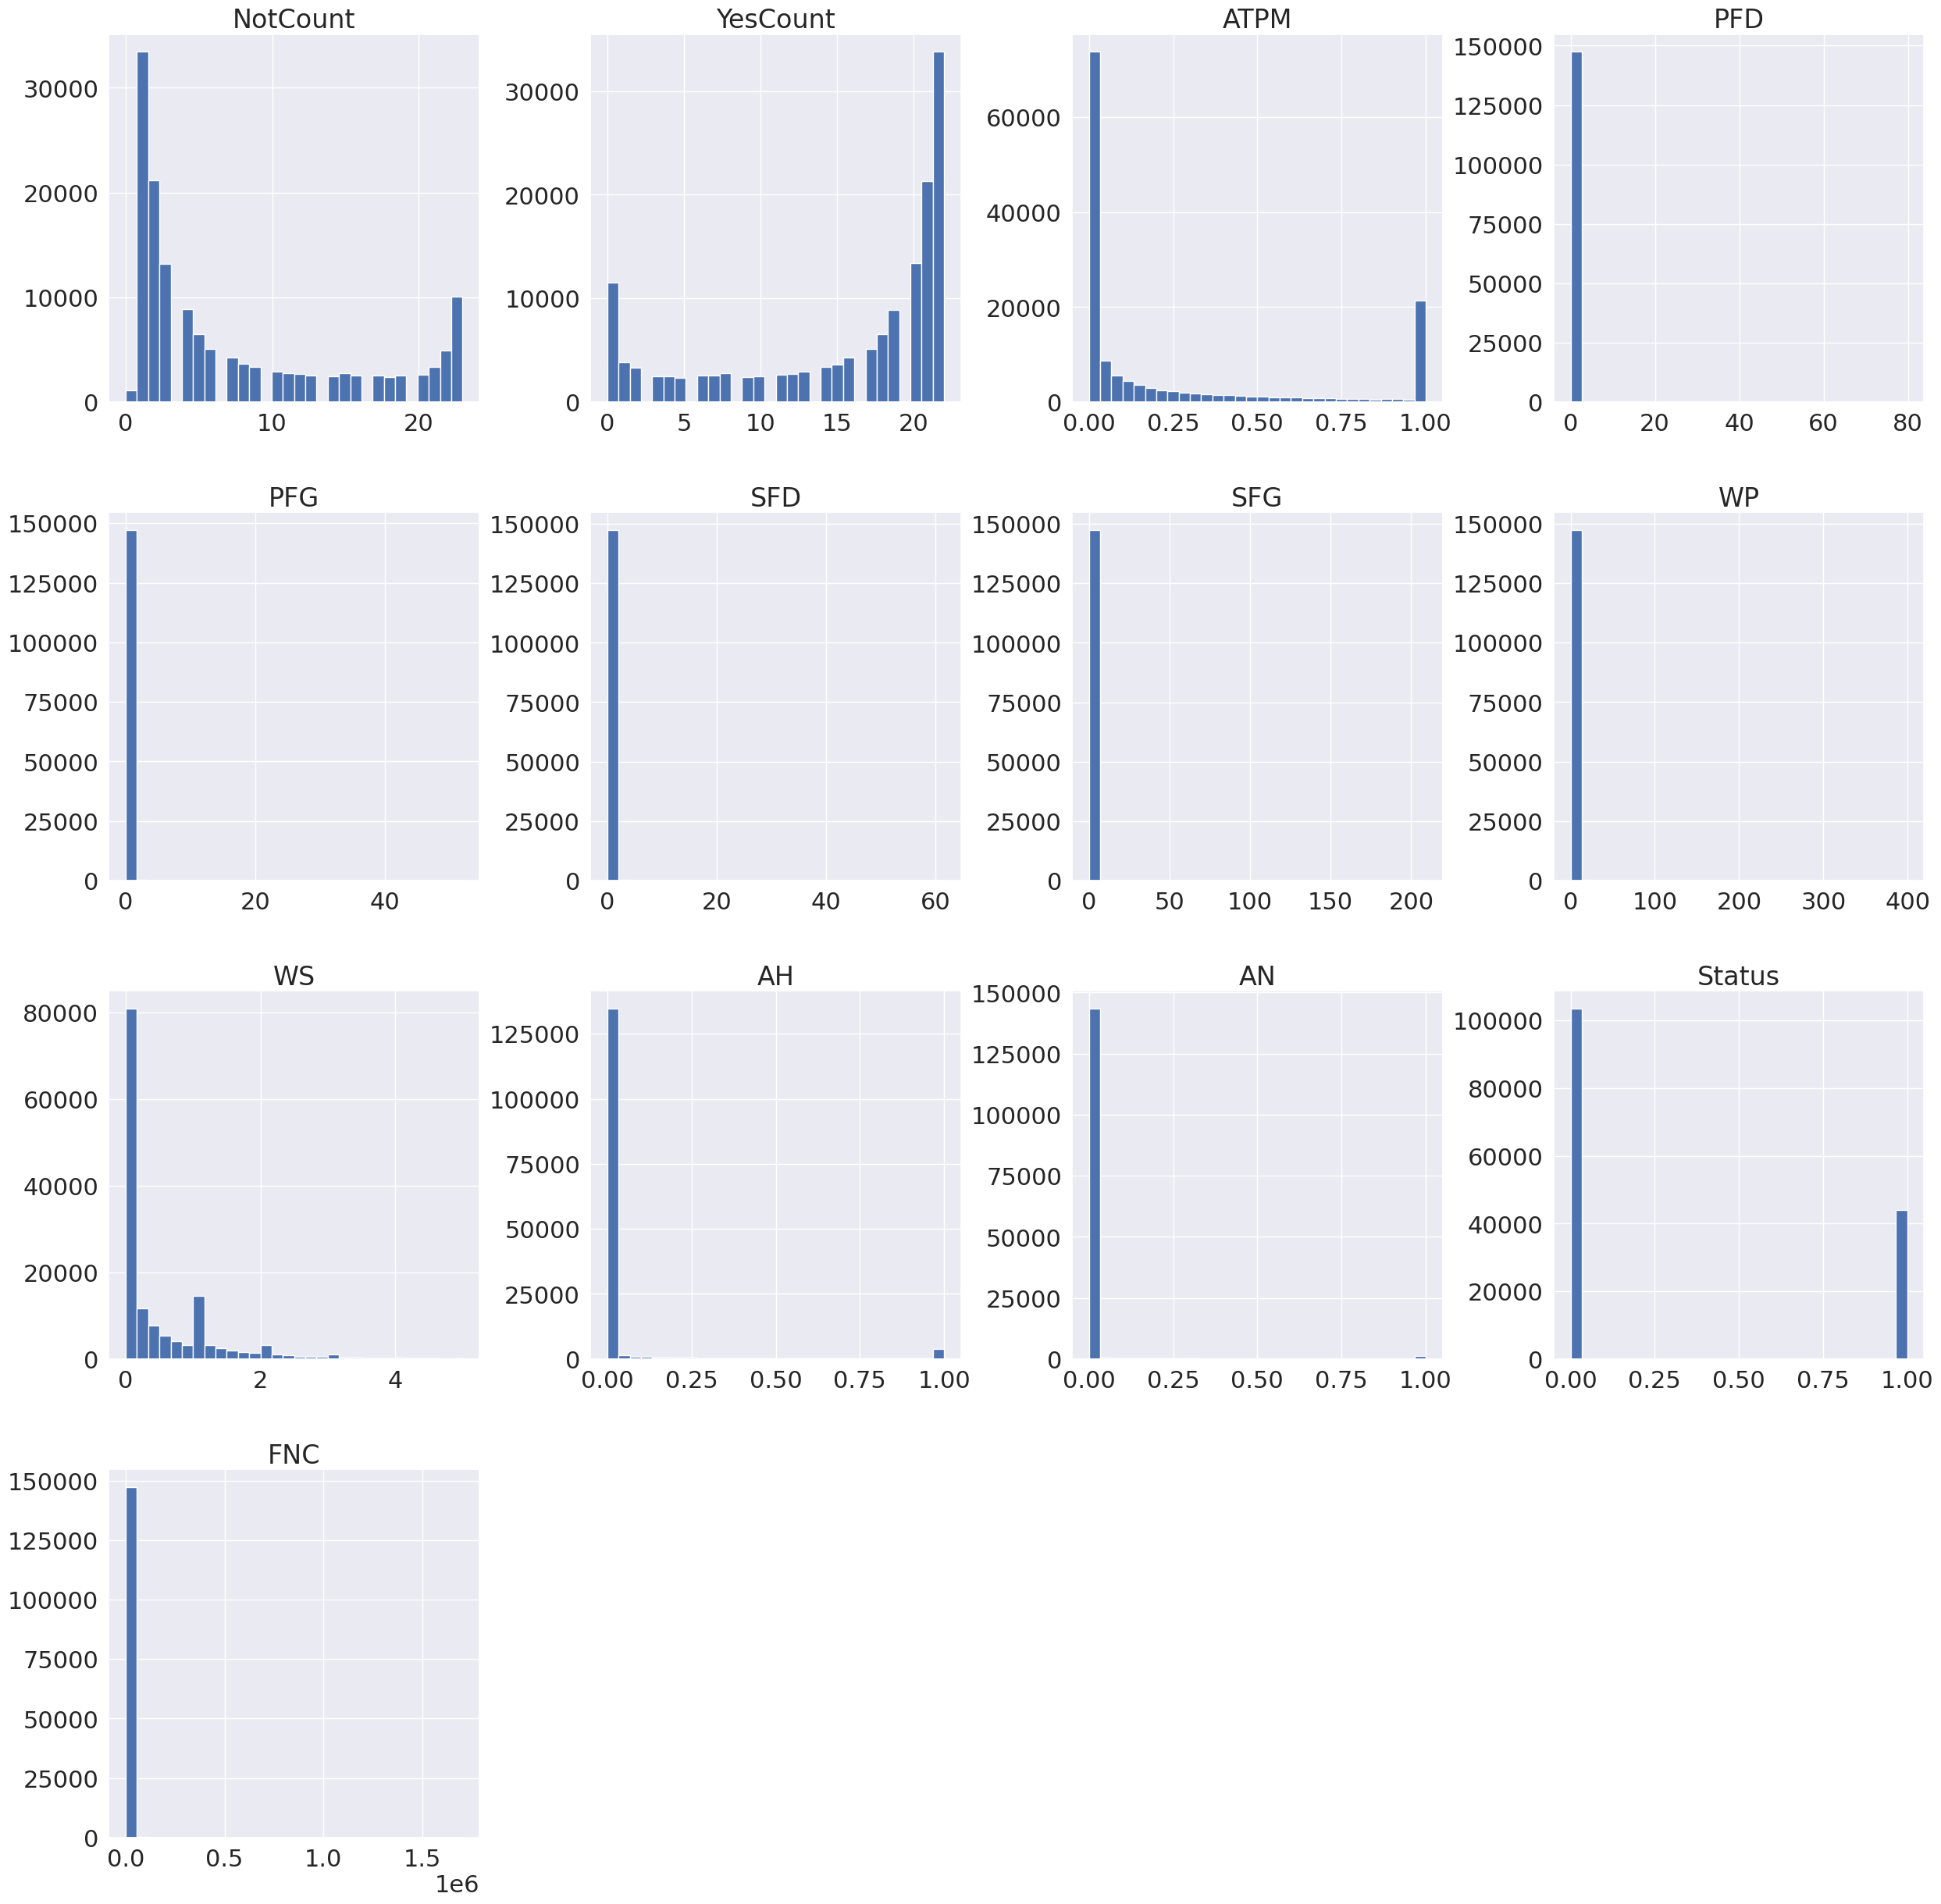

In [ ]:
df.hist(bins=30, figsize=(30, 30))

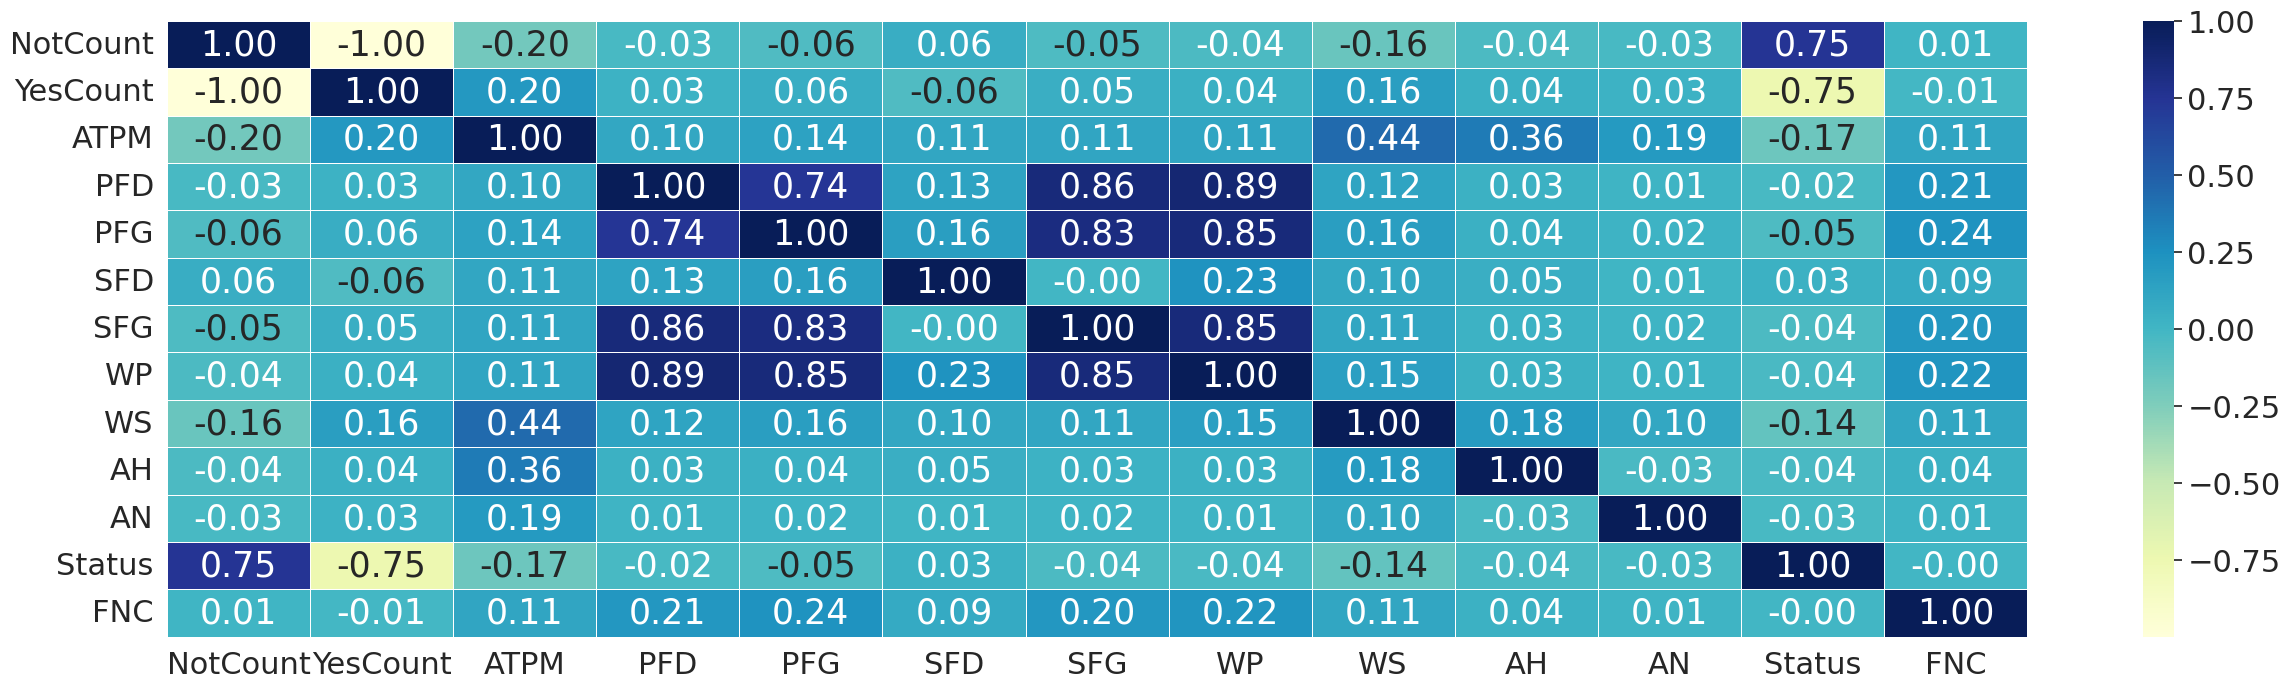

In [ ]:
correlation_train = df.corr("pearson")
sns.set(font_scale=2)
fig = plt.figure(figsize=(30, 8))
ax = sns.heatmap(
    correlation_train,
    annot=True,
    annot_kws={"size": 25},
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
)
fig.show()

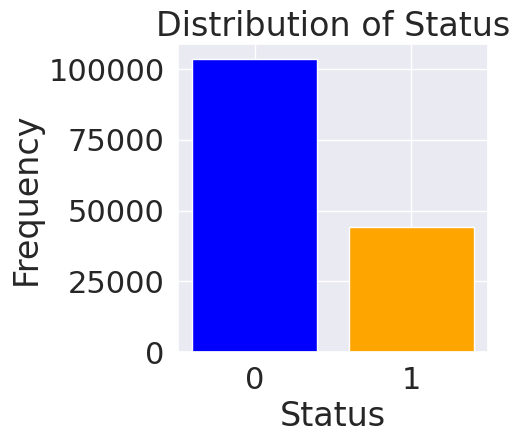

In [ ]:
import matplotlib as mpl
# Count the frequency of each category in the "Status" column
status_counts = df['Status'].value_counts()

# Define a list of colors for each category
colors = ['blue', 'orange']

# Create a figure with a smaller size
plt.figure(figsize=(4, 4))

# Create a bar plot and assign a different color to each bar
plt.bar(status_counts.index, status_counts.values, color=colors[:len(status_counts)])

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Distribution of Status')

# Show the plot
plt.show()

##Creating train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train.shape :", X_train.shape)
print("y_train.shape :", y_train.shape)
print("X_test.shape :", X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (103345, 11)
y_train.shape : (103345,)
X_test.shape : (44291, 11)
y_test.shape : (44291,)


##Preparing cost matrix

Cost Matrix: A matrix that assigns a cost to each cell in the confusion matrix.

In [ ]:
len(df)

147636

In [ ]:
# 147636 is the total number of nodes
FP = [4] * 147636
TP = [4] * 147636
TN = [0] * 147636

cost_mat_df = pd.DataFrame(FP, columns = ['FP'])
cost_mat_df['FN'] = df['FNC']
cost_mat_df['TP'] = TP
cost_mat_df['TN'] = TN
cost_mat_df = cost_mat_df.astype(float)
cost_mat = cost_mat_df.values

In [ ]:
cost_mat[:3]

array([[4., 0., 4., 0.],
       [4., 0., 4., 0.],
       [4., 0., 4., 0.]])

In [ ]:
cost_mat.shape

(147636, 4)

##Confusion matrix
A confusion matrix is a summary of the predictions made by a model on classification tasks. It is a table that summarizes the number of predictions made for each class, separated by the actual class to which each example belongs.

## Loss function for Cost Sensitive LogReg 

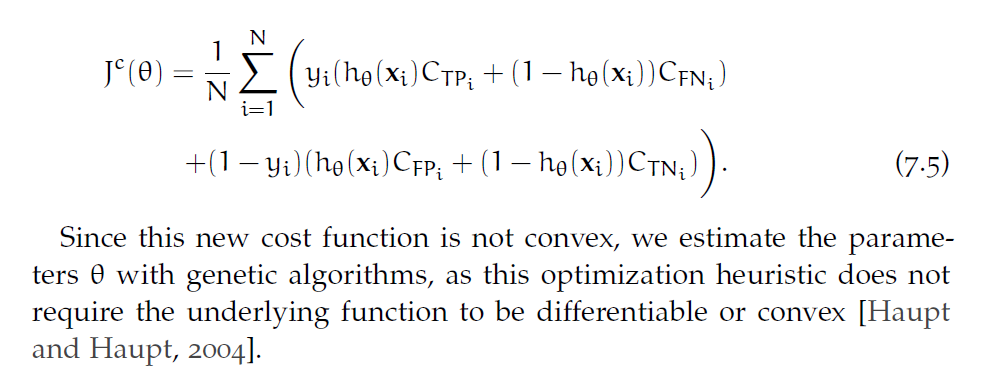

In [ ]:
# calculating the cost using the cost function discussed in the class(optimized one)
def optimal_loss(y_true, y_pred, cost_matrix):
    
    y_true = np.array(y_true).astype(np.float)
    y_pred = np.array(y_pred).astype(np.float)
    total_cost = (y_true) * ((1 - y_pred) * cost_matrix[:, 1] + y_pred * cost_matrix[:, 2]) + (1 - y_true) * ((y_pred * cost_matrix[:, 0] + (1 - y_pred) * cost_matrix[:, 3]))
    return np.sum(total_cost)


## Savings score

In [ ]:
def savings_score(cost_lr, cost_x):
  return (cost_lr - cost_x)/cost_lr

## Using costmatrix to train and test

In [ ]:
# splitting the cost matrix into train and test splits
cost_mat_df_train, cost_mat_df_test = train_test_split(cost_mat_df,test_size=0.30, random_state=42)

In [ ]:
# we now have our cost matrix ready
cost_mat_train = cost_mat_df_train.values
cost_mat_test = cost_mat_df_test.values

In [ ]:
cost_mat_train.shape, cost_mat_test.shape

((103345, 4), (44291, 4))

## Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
cost_lr = optimal_loss(y_test, pred, cost_mat_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, pred, average='binary')
print('Recall: %.3f' % recall)

Accuracy: 0.865
Precision: 0.803
Recall: 0.726


Text(0.5, 1.0, 'Precision 0.803')

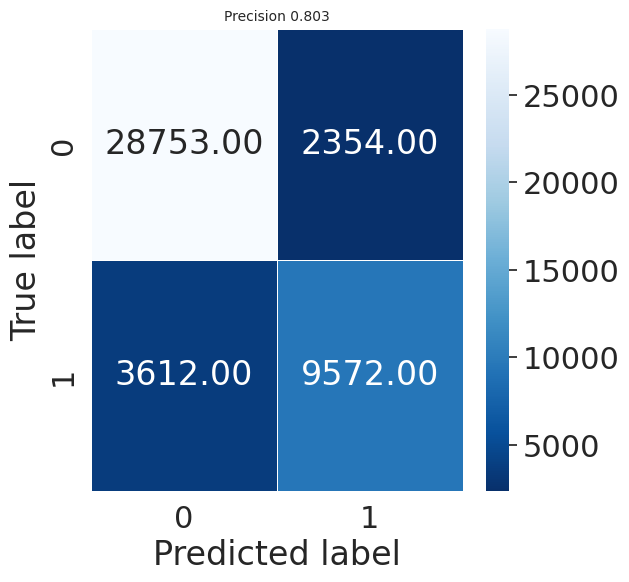

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.4, cmap = 'Blues_r')
plt.xlabel('Predicted label')
plt.ylabel('True label')
title = ('Precision %.3f' % precision)
plt.title(title, size = 10)

In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[28753  2354]
 [ 3612  9572]]


In [ ]:
print("Optimal loss on test data using LogReg:", cost_lr)

Optimal loss on test data uisng LogReg: 1320391.326074


## Cost Sensitive LOgReg

In [ ]:
def intercept_dot(w, X):
    # Initialize the intercept to 0
    c = 0.
    
    # Check if the length of w is equal to the number of columns in X plus 1
    if w.size == X.shape[1] + 1:
        # If it is, set c to the last element of w
        c = w[-1]
        # Remove the last element of w
        w = w[:-1]

    # Compute the dot product of X and w, and add c to the result
    z = np.dot(X, w) + c

    # Return w, c, and z
    return w, c, z


In [ ]:
def sigmoid(z):
    """ Private function that calculate the sigmoid function """
    return 1 / (1 + np.exp(-z))


In [ ]:
def logistic_cost_loss_iter(w, X, y, cost_mat, alpha=10):
    # w: weights vector
    # X: feature matrix
    # y: target vector
    # cost_mat: cost matrix
    # alpha: regularization parameter
    
    # Get number of samples
    n_samples = X.shape[0]
    
    # Compute dot product of weights and feature matrix with added intercept
    w, c, z = intercept_dot(w, X)
    
    # Compute sigmoid of dot product to get probability estimates
    y_prob = sigmoid(z)

    # Compute optimal loss using the cost matrix
    out = optimal_loss(y, y_prob, cost_mat) / n_samples
    
    #print(alpha)

    # Add regularization term to the loss
    out += 0.5 * alpha * np.dot(w, w)
    
    return out


In [ ]:
def logistic_cost_loss_total(w, X, y, cost_mat, alpha=10):
    # w: weights vector or matrix
    # X: feature matrix
    # y: target vector
    # cost_mat: cost matrix
    # alpha: regularization parameter
    alpha = 2
    if w.shape[0] == w.size:
        # Only evaluating one w, so call logistic_cost_loss_i function
        return logistic_cost_loss_iter(w, X, y, cost_mat, alpha)

    else:
        # Evaluating a set of w, so loop over each w and compute the loss
        n_w = w.shape[0]
        out = np.zeros(n_w)

        for i in range(n_w):
            out[i] = logistic_cost_loss_iter(w[i], X, y, cost_mat, alpha)

        return out


In [ ]:
class Cost_Sensitive_Logistic_Regression():
    
    def train(self, X, y, cost_matrix):
        # X: feature matrix
        # y: target vector
        # cost_matrix: cost matrix
        
        # Initialize weights vector with zeros
        w_trans = np.zeros(X.shape[1] + 1)
        
        # Use a genetic algorithm to optimize the logistic cost loss function
        # Pass the logistic_cost_loss function, the number of weights, number of iterations, number of chromosomes, mutation probability, type of optimization, and additional arguments
        genetic_model = GeneticAlgorithmOptimizer(logistic_cost_loss_total, w_trans.shape[0], iters=50, n_chromosomes=100, per_mutations=0.25, type_='cont', fargs=(X, y, cost_matrix, 1))
        genetic_model.fit()
        
        # Save the optimized coefficients and intercept
        self.coefficient = genetic_model.x[:-1]
        self.intercept = genetic_model.x[-1]
            
    def get_predicted_prob(self, X, cut_point=0.5):
        # X: feature matrix
        # cut_point: threshold for binary classification
        
        # Initialize matrix to hold probability estimates for both classes
        y_prob = np.zeros((X.shape[0], 2))
        
        # Compute probability estimate for class 1
        y_prob[:, 1] = sigmoid(np.dot(X, self.coefficient) + self.intercept)
        
        # Compute probability estimate for class 0
        y_prob[:, 0] = 1 - y_prob[:, 1]
        
        return y_prob

    def predict(self, X, cut_point=0.5):
        # X: feature matrix
        # cut_point: threshold for binary classification
        
        # Get probability estimates for each class
        y_prob = self.get_predicted_prob(X, cut_point)
        
        # Return predicted class labels based on probability estimates and threshold
        return np.floor(y_prob[:, 1] + (1 - cut_point))


In [ ]:
# Instantiate a Cost_Sensitive_Logistic_Regression object
model = Cost_Sensitive_Logistic_Regression()

# Train the model using the training data and cost matrix
model.train(X_train, y_train, cost_mat_train)

# Get predictions for the test data
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Accuracy: 0.298
Precision: 0.298
Recall: 1.000


In [ ]:
#Finding cost sensitive loss
cost_x = optimal_loss(y_test,y_pred,cost_mat_test)
print("Optimal loss on test data uisng Cost Sensitive LogReg:", cost_x)

177164.0

## Finding the Saving Score

In [ ]:
saving_score_costSen = savings_score(cost_lr,cost_x)
saving_score_costSen

0.8658246260017683